In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r'D:\DA_Portfolio\Global Condom Sales and Awareness (2015-2025)\Dataset\Rich_Global_Condom_Usage_Dataset.csv')
df['Year'] = pd.to_datetime(df['Year'], errors='coerce', format='%Y')  
df['Year'] = df['Year'].dt.year


df[['Male Purchases (%)', 'Female Purchases (%)']] = df['Male vs Female Purchases (%)'].str.extract(r'(\d+)% Male - (\d+)% Female')
df = df.drop(columns='Male vs Female Purchases (%)')

df.rename(columns={'Teen Pregnancy Rate (per 1000 teens)': 'Teen Pregnancy Rate (per 10000 teens)'}, inplace=True)

df['Male Purchases (%)'] = pd.to_numeric(df['Male Purchases (%)'], errors='coerce')
df['Female Purchases (%)'] = pd.to_numeric(df['Female Purchases (%)'], errors='coerce')

custom_palette = ['#E63946','#A8DADC', '#457B9D', '#1D3557','#F1FAEE']
custom_palette2 = ['#E63946','#A8DADC']

In [4]:
df.columns

Index(['Year', 'Country', 'Total Sales (Million Units)',
       'Market Revenue (Million USD)', 'Government Campaigns',
       'Awareness Index (0-10)', 'Most Popular Condom Type',
       'Contraceptive Usage Rate (%)', 'Teen Pregnancy Rate (per 10000 teens)',
       'HIV Prevention Awareness (%)', 'Online Sales (%)',
       'Average Price per Condom (USD)', 'Brand Dominance',
       'Sex Education Programs (Yes/No)', 'Male Purchases (%)',
       'Female Purchases (%)'],
      dtype='object')

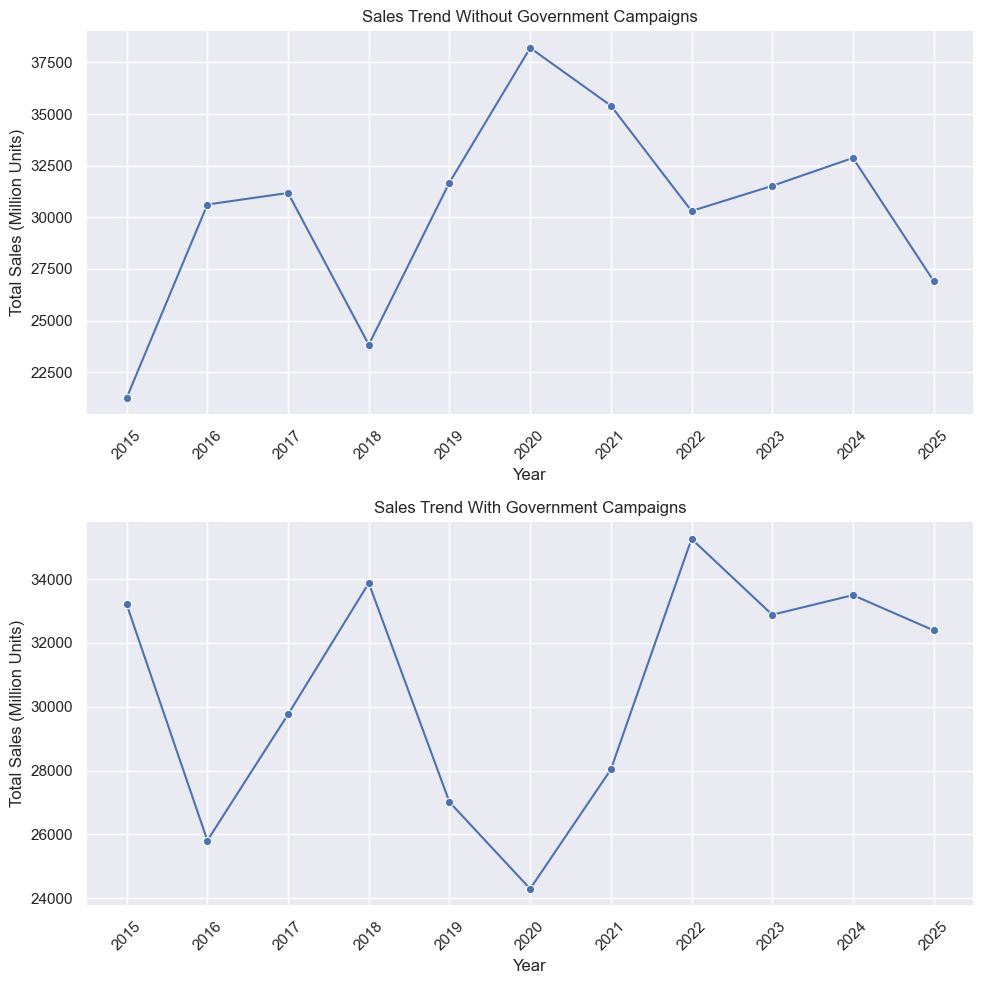

In [9]:

df_no_campaigns = df[df['Government Campaigns'] == 'No'].copy()
df_campaigns = df[df['Government Campaigns'] == 'Yes'].copy()

df_no_campaigns = df_no_campaigns.groupby('Year', as_index=False)['Total Sales (Million Units)'].sum()
df_campaigns = df_campaigns.groupby('Year', as_index=False)['Total Sales (Million Units)'].sum()

df_no_sex_edu = df[df['Sex Education Programs (Yes/No)'] == 'No'].copy()
df_sex_edu = df[df['Sex Education Programs (Yes/No)'] == 'Yes'].copy()

df_no_sex_edu = df_no_sex_edu.groupby('Year', as_index=False)['Total Sales (Million Units)'].sum()
df_sex_edu = df_sex_edu.groupby('Year', as_index=False)['Total Sales (Million Units)'].sum()


fig, ax = plt.subplots(2, 1, figsize=(10, 10))  # 2 rows, 1 column


sns.set_theme(style='darkgrid')


sns.lineplot(data=df_no_campaigns, x='Year', y='Total Sales (Million Units)', ax=ax[0],marker='o')
ax[0].set_title("Sales Trend Without Government Campaigns")
ax[0].set_xticks(df_no_campaigns['Year'])
ax[0].set_xticklabels(df_no_campaigns['Year'], rotation=45)

sns.lineplot(data=df_campaigns, x='Year', y='Total Sales (Million Units)', ax=ax[1],marker='o')
ax[1].set_title("Sales Trend With Government Campaigns")
ax[1].set_xticks(df_campaigns['Year'])
ax[1].set_xticklabels(df_campaigns['Year'], rotation=45)


plt.tight_layout()
plt.show()

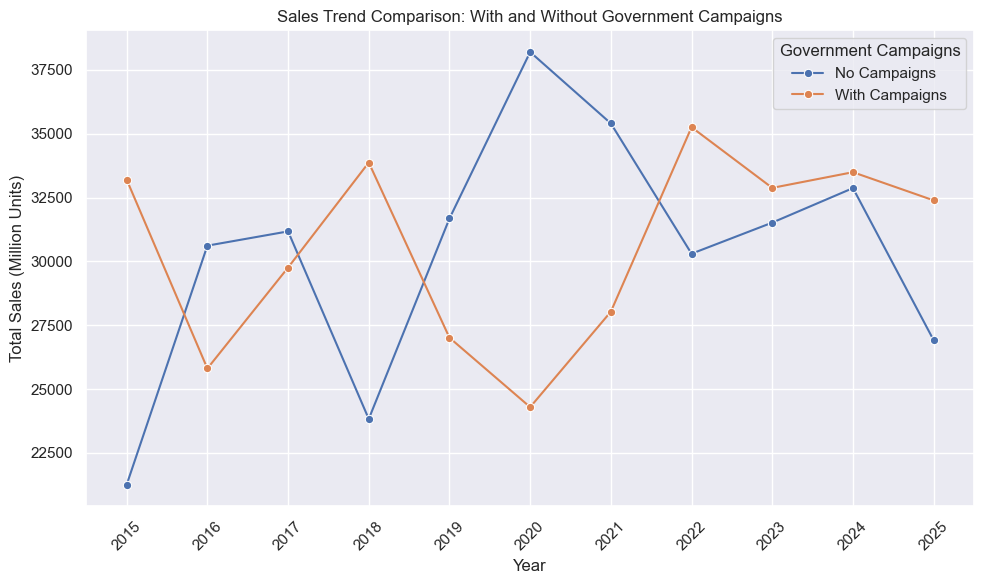

In [ ]:



df_no_campaigns = df[df['Government Campaigns'] == 'No'].copy()
df_campaigns = df[df['Government Campaigns'] == 'Yes'].copy()

df_no_campaigns = df_no_campaigns.groupby('Year', as_index=False)['Total Sales (Million Units)'].sum()
df_campaigns = df_campaigns.groupby('Year', as_index=False)['Total Sales (Million Units)'].sum()


plt.figure(figsize=(10, 6))

sns.set_theme(style='darkgrid')


sns.lineplot(data=df_no_campaigns, x='Year', y='Total Sales (Million Units)', label='No Campaigns', marker='o')
sns.lineplot(data=df_campaigns, x='Year', y='Total Sales (Million Units)', label='With Campaigns', marker='o')


plt.title('Sales Trend Comparison: With and Without Government Campaigns')
plt.xlabel('Year')
plt.ylabel('Total Sales (Million Units)')
plt.xticks(df_no_campaigns['Year'], rotation=45)


plt.legend(title='Government Campaigns')
plt.tight_layout()
plt.show()


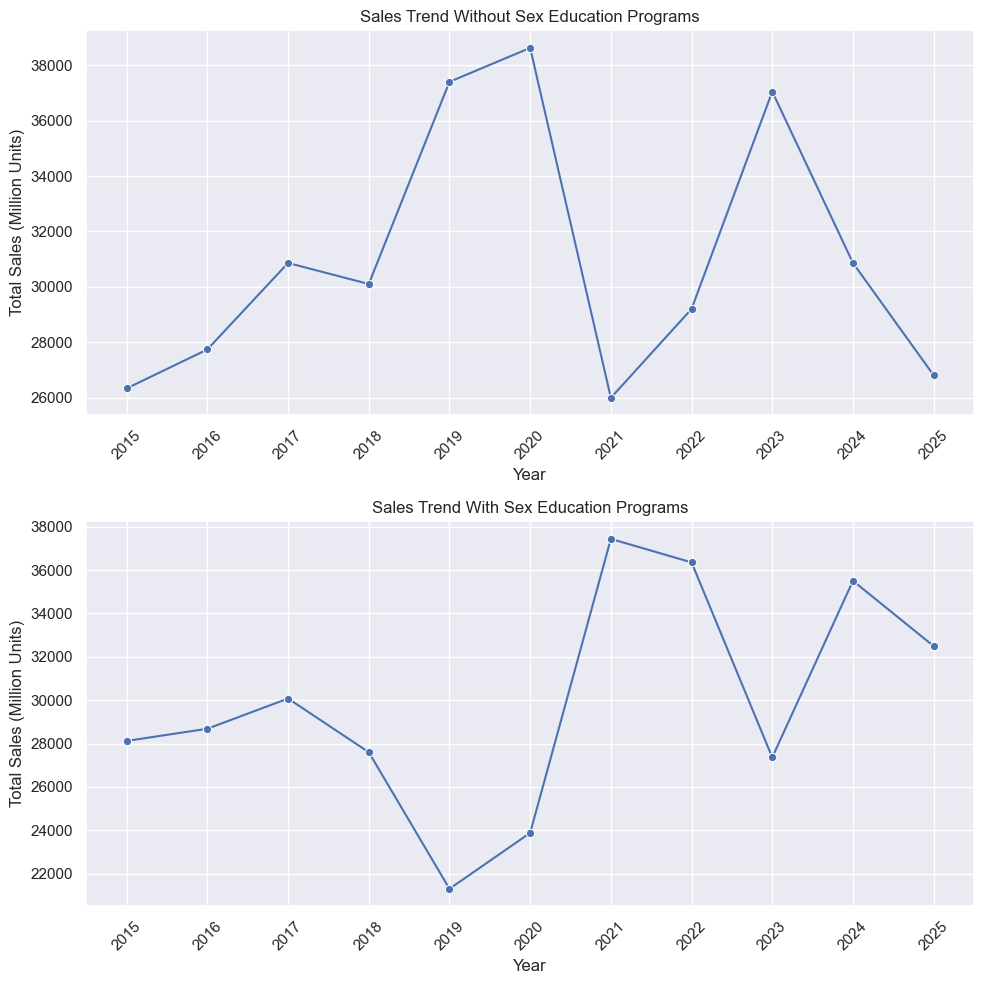

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))  # 2 rows, 1 column


sns.set_theme(style='darkgrid')


sns.lineplot(data=df_no_sex_edu, x='Year', y='Total Sales (Million Units)', ax=ax[0],marker='o')
ax[0].set_title("Sales Trend Without Sex Education Programs")
ax[0].set_xticks(df_no_sex_edu['Year'])
ax[0].set_xticklabels(df_no_sex_edu['Year'], rotation=45)

sns.lineplot(data=df_sex_edu, x='Year', y='Total Sales (Million Units)', ax=ax[1],marker='o')
ax[1].set_title("Sales Trend With Sex Education Programs")
ax[1].set_xticks(df_sex_edu['Year'])
ax[1].set_xticklabels(df_sex_edu['Year'], rotation=45)

plt.tight_layout()
plt.show()